In [2]:
# %matplotlib Qt
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.neighbors import KNeighborsClassifier

from modules import KNN, FindingNemo, FindingDory

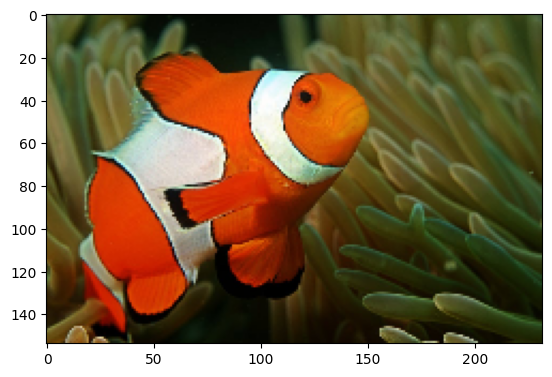

In [5]:
nemo = cv.imread('data/nemo.jpg')
nemo = cv.resize(nemo, (0, 0), fx=0.25, fy=0.25)
nemo_rgb = cv.cvtColor(nemo, cv.COLOR_BGR2RGB)

plt.imshow(nemo_rgb)
plt.show()

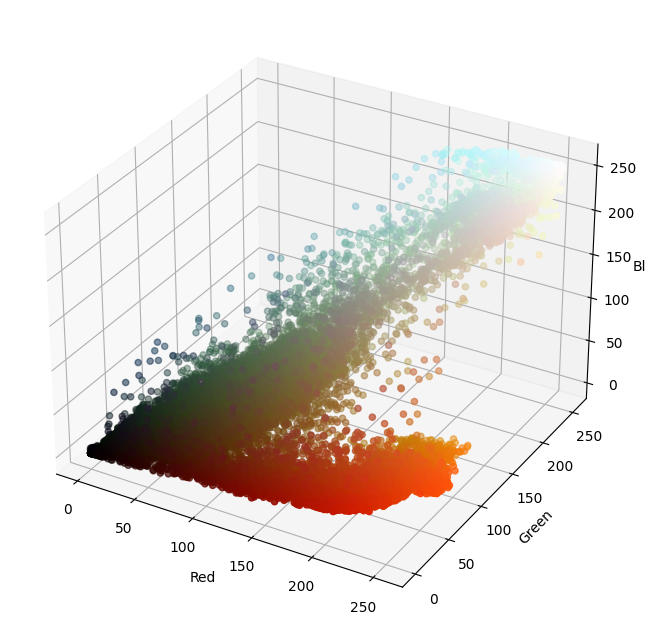

In [6]:
nemo_rgb_px_List = nemo_rgb.reshape(-1, 3)
nemo_rgb_px_List.shape

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(nemo_rgb_px_List[:, 0], nemo_rgb_px_List[:, 1], nemo_rgb_px_List[:, 2], c=nemo_rgb_px_List / 255)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

In [7]:
nemo_hsv = cv.cvtColor(nemo, cv.COLOR_BGR2HSV)

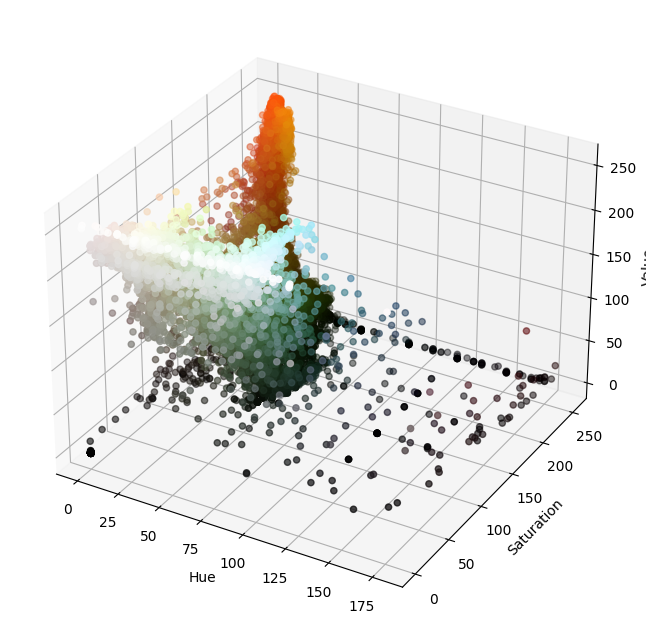

In [8]:
nemo_hsv_px_List = nemo_hsv.reshape(-1, 3)
nemo_hsv_px_List.shape

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(nemo_hsv_px_List[:, 0], nemo_hsv_px_List[:, 1], nemo_hsv_px_List[:, 2], c=nemo_rgb_px_List / 255)
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')
plt.show()

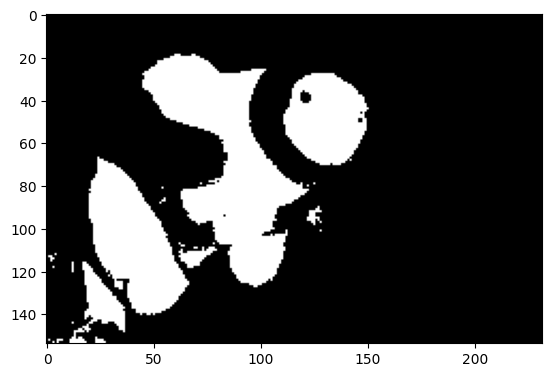

In [9]:
light_orange = (1, 50, 100)
dark_orange = (18, 255, 255)

orange_mask = cv.inRange(nemo_hsv, light_orange, dark_orange)

plt.imshow(orange_mask, cmap='gray')
plt.show()


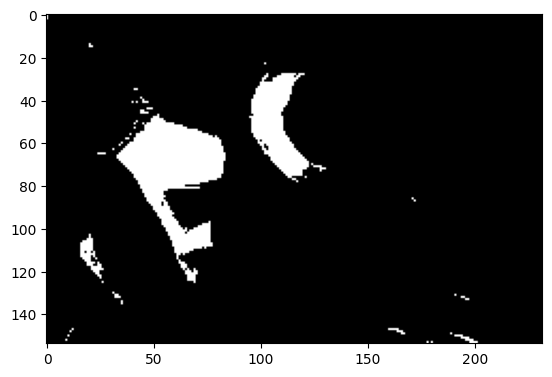

In [10]:
light_white = (0, 0, 100)
dark_white = (145, 60, 255)

white_mask = cv.inRange(nemo_hsv, light_white, dark_white)

plt.imshow(white_mask, cmap='gray')
plt.show()

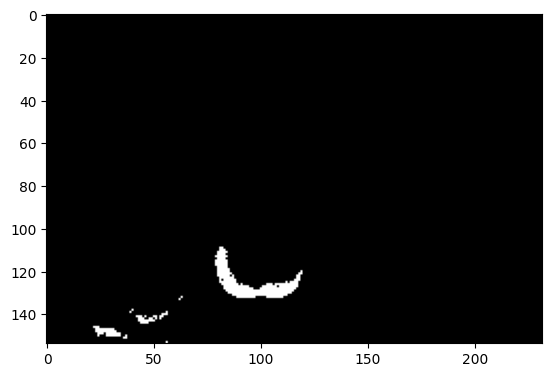

In [11]:
light_black = (0, 0, 0)
dark_black = (255, 255, 4)

black_mask = cv.inRange(nemo_hsv, light_black, dark_black)

plt.imshow(black_mask, cmap='gray')
plt.show()

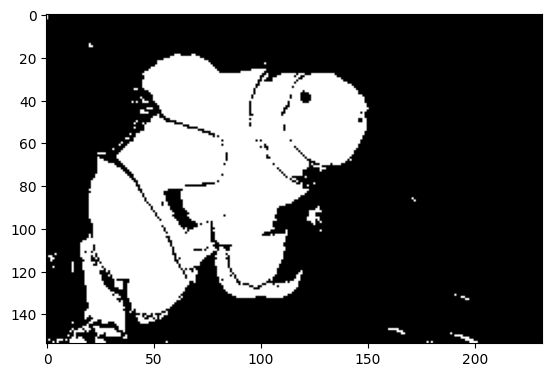

In [12]:
nemo_mask = orange_mask + white_mask + black_mask

plt.imshow(nemo_mask, cmap='gray')
plt.show()

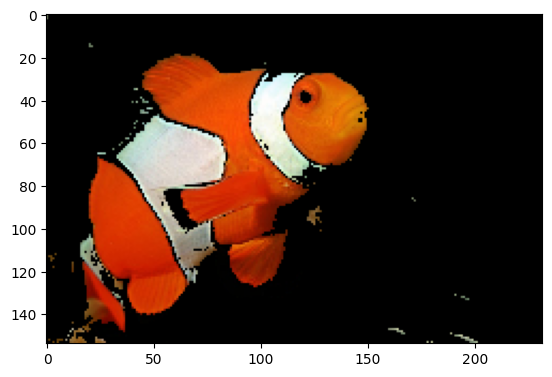

In [13]:
final_result = cv.bitwise_and(nemo_rgb, nemo_rgb, mask=nemo_mask)
plt.imshow(final_result)
plt.show()

In [14]:
x_train = nemo_hsv_px_List / 255
x_train.shape

(35728, 3)

In [15]:
y_train = nemo_mask.reshape(-1, ) // 255
y_train.shape

(35728,)

In [16]:
# knn = KNN(3)
knn = KNeighborsClassifier(3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
new_px = np.array([10, 200, 255]) / 255
knn.predict([new_px])

array([1], dtype=uint8)

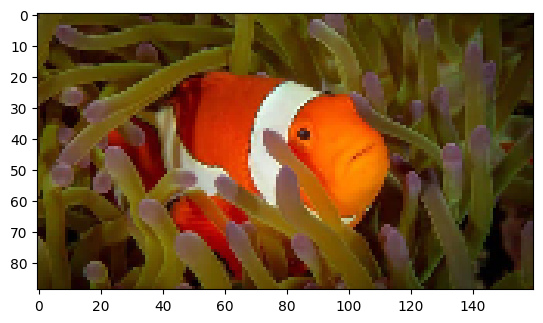

In [18]:
dash_nemo = cv.imread('data/dash_nemo.jpg')
dash_nemo = cv.resize(dash_nemo, (0, 0), fx=0.25, fy=0.25)
dash_nemo_rgb = cv.cvtColor(dash_nemo, cv.COLOR_BGR2RGB)
plt.imshow(dash_nemo_rgb)
plt.show()


In [19]:
dash_nemo_hsv = cv.cvtColor(dash_nemo, cv.COLOR_BGR2HSV)
dash_nemo_hsv.shape

(89, 160, 3)

In [20]:
x_test = dash_nemo_hsv.reshape(-1, 3) / 255
x_test.shape

(14240, 3)

In [21]:
y_pred = knn.predict(x_test)

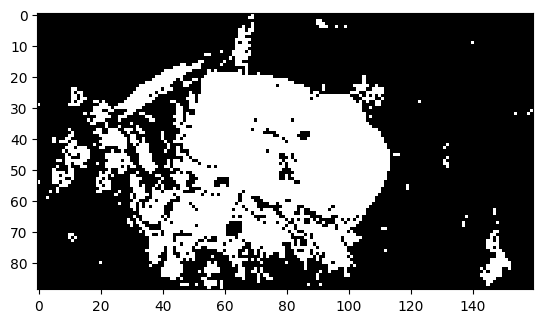

In [22]:
output = np.array(y_pred).reshape(dash_nemo.shape[:2])
plt.imshow(output, cmap='gray')
plt.show()

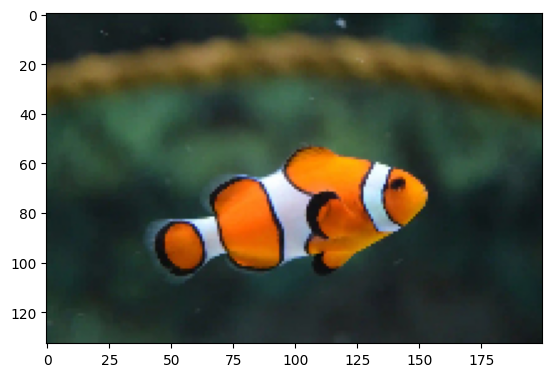

In [23]:
abjie_nemo = cv.imread('data/abjie-nemo.jpg')
abjie_nemo = cv.resize(abjie_nemo, (0, 0), fx=0.2, fy=0.2)
abjie_nemo_rgb = cv.cvtColor(abjie_nemo, cv.COLOR_BGR2RGB)
plt.imshow(abjie_nemo_rgb)
plt.show()

In [24]:
abjie_nemo_hsv = cv.cvtColor(abjie_nemo, cv.COLOR_BGR2HSV)
abjie_nemo_hsv.shape

(133, 200, 3)

In [25]:
x_test = abjie_nemo_hsv.reshape(-1, 3) / 255
x_test.shape

(26600, 3)

In [26]:
y_pred = knn.predict(x_test)

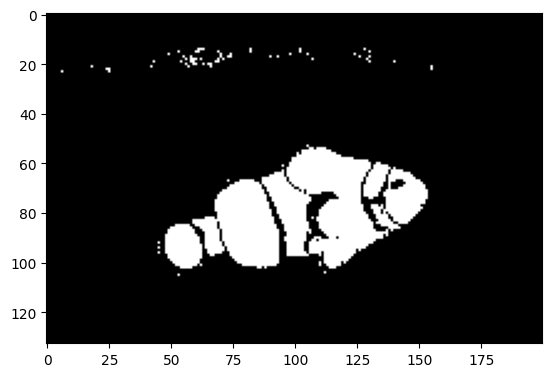

In [27]:
output = np.array(y_pred).reshape(abjie_nemo.shape[:2])
plt.imshow(output, cmap='gray')
plt.show()

In [28]:
output = output.astype('uint8')

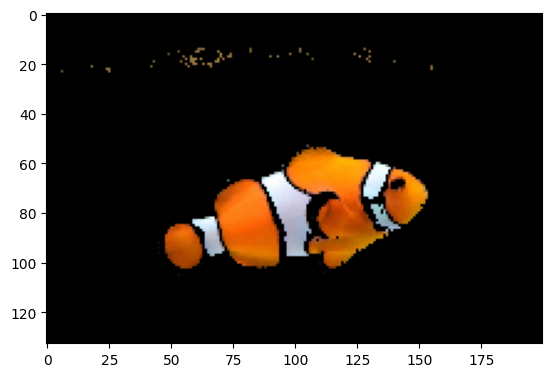

In [29]:
final_result_abji = cv.bitwise_and(abjie_nemo_rgb, abjie_nemo_rgb, mask=output)
plt.imshow(final_result_abji)
plt.show()

## Remove BG with FindingNemo Class:

In [30]:
train_nemo = cv.imread('data/nemo.jpg')


In [31]:
test_nemo = cv.imread('data/abjie-nemo.jpg')
# test_nemo = cv.imread('data/dash_nemo.jpg')

In [32]:
trained_data = FindingNemo(train_nemo)

In [33]:
rm_bg_nemo = trained_data.remove_background(test_nemo)

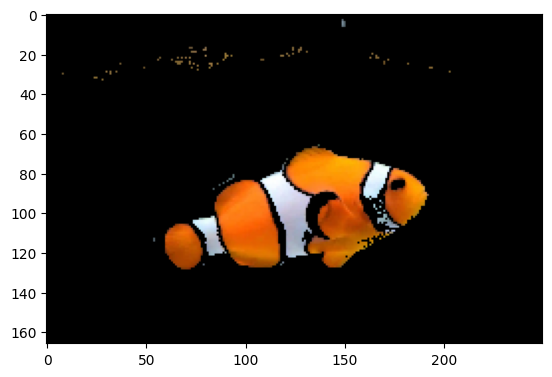

In [34]:
plt.imshow(rm_bg_nemo)
plt.show()

## Remove BG with FindingDory Class:

In [35]:
train_dory = cv.imread('data/dory.jpg')

In [36]:
# test_dory = cv.imread('data/abji-dory.jpg')
test_dory = cv.imread('data/dash-dory.jpg')

In [37]:
trained_data = FindingDory(train_dory)

In [38]:
rm_bg_dory = trained_data.remove_background(test_dory)

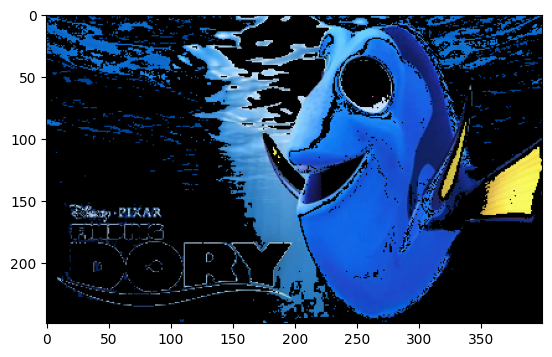

In [39]:
plt.imshow(rm_bg_dory)
plt.show()